In [52]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,recall_score,confusion_matrix

In [53]:
df = pd.read_csv('data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [55]:
df.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64

<Axes: >

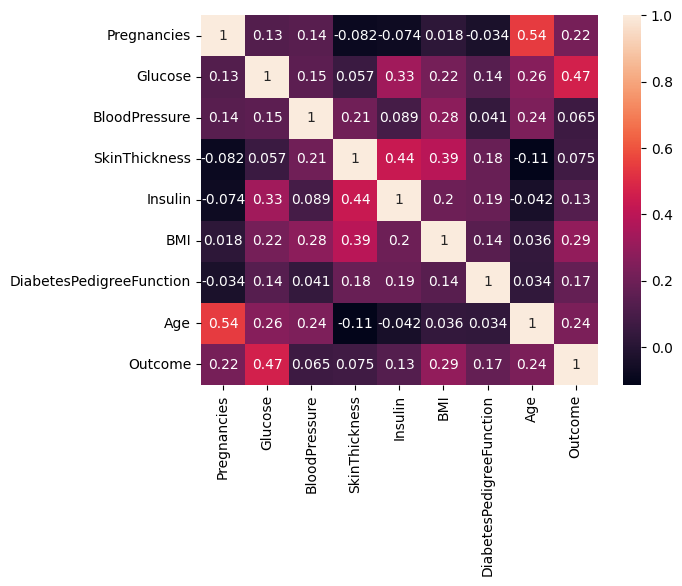

In [56]:
sns.heatmap(df.corr(),annot=True)

In [57]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [58]:
df = df[['Outcome','Glucose','BMI','Age']]

array([[<Axes: title={'center': 'Outcome'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>]],
      dtype=object)

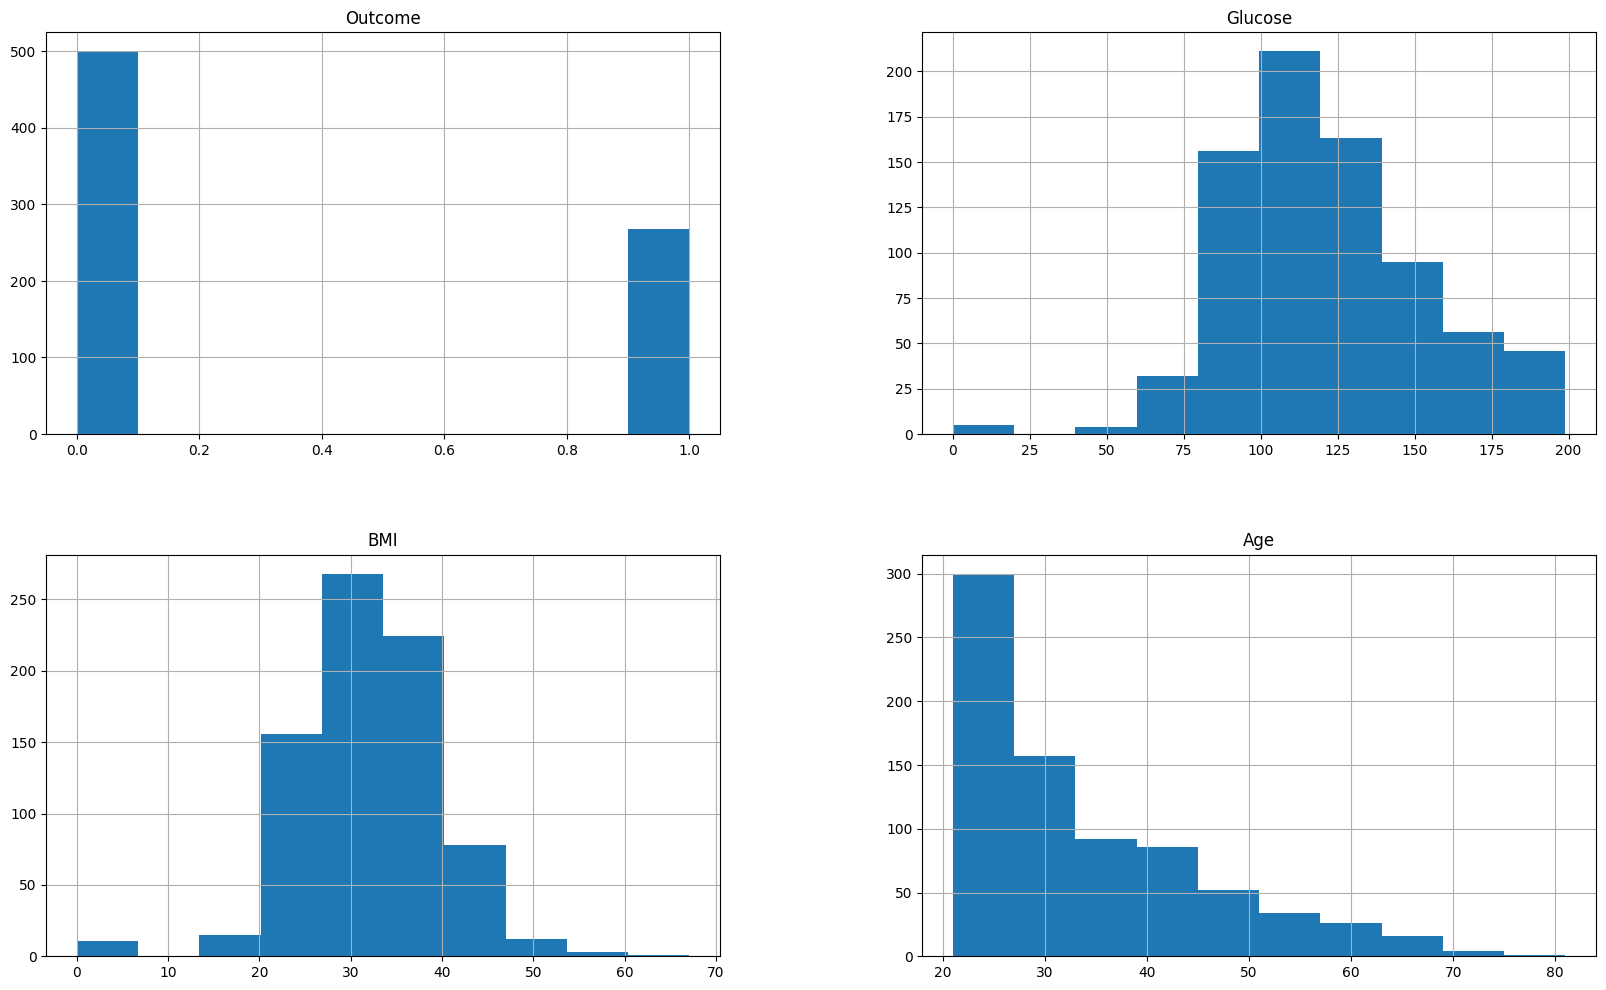

In [59]:
df.hist(figsize=(20,12))

In [60]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,recall_score,confusion_matrix
n_neighbors_list = range(1,50)

best_score = 0
best_n_neighbors = None

for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_n_neighbors = n_neighbors

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Best n_neighbors:", best_n_neighbors)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 score:", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)


Best n_neighbors: 18
Accuracy: 0.7792207792207793
Recall: 0.5636363636363636
F1 score: 0.6458333333333333


array([[89, 10],
       [24, 31]])

In [63]:
glucose = 120
bmi = 33
age = 52
"Positive" if knn.predict([[glucose,bmi,age]])[0] else "Negative"

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Negative'